In [1]:
!pip install -q kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"veronicaastorino","key":"54c2af6efd7d9e1c3f94a8fbe142e1ac"}'}

In [2]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d moltean/fruits

! mkdir fruits
! unzip fruits.zip -d fruits

Output streaming troncato alle ultime 5000 righe.
  inflating: fruits/fruits-360/Training/Tomato 3/111_100.jpg  
  inflating: fruits/fruits-360/Training/Tomato 3/112_100.jpg  
  inflating: fruits/fruits-360/Training/Tomato 3/113_100.jpg  
  inflating: fruits/fruits-360/Training/Tomato 3/114_100.jpg  
  inflating: fruits/fruits-360/Training/Tomato 3/115_100.jpg  
  inflating: fruits/fruits-360/Training/Tomato 3/116_100.jpg  
  inflating: fruits/fruits-360/Training/Tomato 3/117_100.jpg  
  inflating: fruits/fruits-360/Training/Tomato 3/119_100.jpg  
  inflating: fruits/fruits-360/Training/Tomato 3/120_100.jpg  
  inflating: fruits/fruits-360/Training/Tomato 3/121_100.jpg  
  inflating: fruits/fruits-360/Training/Tomato 3/122_100.jpg  
  inflating: fruits/fruits-360/Training/Tomato 3/123_100.jpg  
  inflating: fruits/fruits-360/Training/Tomato 3/124_100.jpg  
  inflating: fruits/fruits-360/Training/Tomato 3/125_100.jpg  
  inflating: fruits/fruits-360/Training/Tomato 3/126_100.jpg  
  inf

# Preprocessing

In [3]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from keras.preprocessing.image  import ImageDataGenerator, img_to_array,load_img
import matplotlib.pyplot as plt
from glob import glob

In [4]:
train_path = "/content/fruits/fruits-360/Training/"
test_path = "/content/fruits/fruits-360/Test/"

In [5]:
import os
import shutil
fruits = ["Apple", "Banana", "Plum", "Pepper", "Cherry", "Grape", "Tomato", "Potato", "Pear", "Peach"]
!mkdir -p "/content/fruits/fruits-360/train1/"
!mkdir -p "/content/fruits/fruits-360/test1/"


In [6]:
from os import walk
import os, re

BASE_PATH= "/content/fruits/fruits-360/train1/"
base1_path= "/content/fruits/fruits-360/test1/"

def fruitdir(path):
  for i in fruits:
    out_dir = os.path.join(path+i)

    if not os.path.isdir(out_dir):
            os.mkdir(out_dir)


fruitdir(BASE_PATH)
fruitdir(base1_path)

  

In [7]:
trainjpg=[]
for i ,j ,k in walk(train_path):
 trainjpg.append(i)

testjpg=[]
for i ,j ,k in walk(test_path):
 testjpg.append(i)


In [8]:
def fruitsjpg(list,path):
  for i in fruits:
       for j in list:
             if i in j:
               file_names = os.listdir(j+"/")
               for file_name in file_names:
                 shutil.copy(os.path.join(j+"/", file_name), path+i+"/")

fruitsjpg(trainjpg,BASE_PATH)
fruitsjpg(testjpg,base1_path)

In [9]:
train_path="/content/fruits/fruits-360/test1/"
test_path="/content/fruits/fruits-360/train1/"

In [10]:
classes = glob(train_path + "/*")
number_of_class = len(classes)
print("Number of class : " , number_of_class)

Number of class :  10


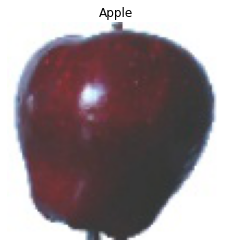

In [11]:
img = load_img(train_path + "Apple/0_100.jpg")
plt.imshow(img)
plt.title("Apple")
plt.axis("off")
plt.show()



In [12]:
shape_of_image = img_to_array(img)
print(shape_of_image.shape)

(100, 100, 3)


In [13]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                   shear_range = 0.3,
                   horizontal_flip = True,
                   zoom_range = 0.3)
test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(train_path,
                                                   target_size = shape_of_image.shape[:2],
                                                   batch_size = 50,
                                                   color_mode = 'rgb',
                                                   class_mode = 'categorical')
test_generator = test_datagen.flow_from_directory(test_path,
                                                   target_size = shape_of_image.shape[:2],
                                                   batch_size = 50,
                                                   color_mode = 'rgb',
                                                   class_mode = 'categorical')

Found 5855 images belonging to 10 classes.
Found 9192 images belonging to 10 classes.


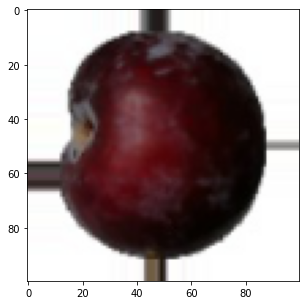

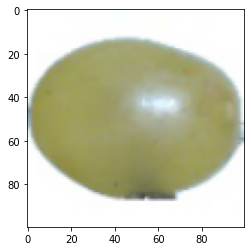

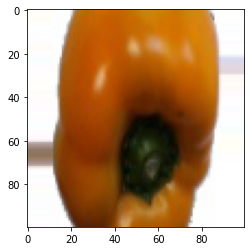

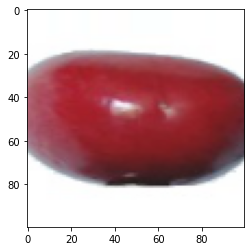

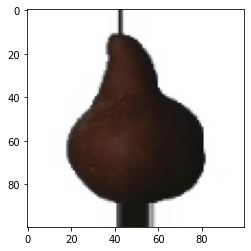

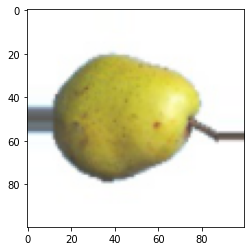

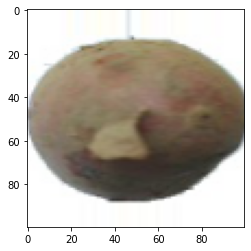

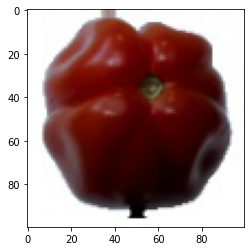

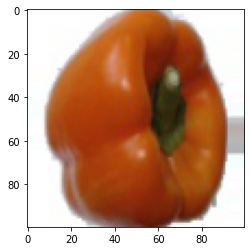

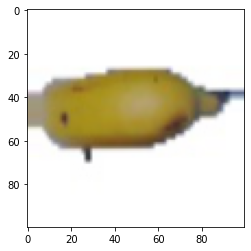

In [14]:
x,y = train_generator.next()
fig = plt.figure(figsize =(30,5))
for i in range(10):
 image = x[i]
 plt.imshow(image)
 plt.show()

In [15]:
xtest,ytest=test_generator.next()

In [16]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from keras.preprocessing.image  import ImageDataGenerator, img_to_array,load_img
import matplotlib.pyplot as plt
from glob import glob
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras import layers
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, AveragePooling2D, Activation, MaxPool2D, InputLayer
from keras.layers.normalization import BatchNormalization
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import np_utils
import datetime
from sklearn.utils import shuffle
import random

In [17]:
#tf.keras.backend.clear_session()
#batch_size = 32
#number_of_batch = 1600 // batch_size

# VGG 3

In [18]:
vgg3 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), padding = "same", activation='relu', input_shape = (100, 100, 3)),
    tf.keras.layers.Conv2D(32, (3, 3), padding = "same", activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(64, (3, 3), padding = "same", activation='relu'),
    tf.keras.layers.Conv2D(64, (3, 3), padding = "same", activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(128, (3, 3), padding = "same", activation='relu'),
    tf.keras.layers.Conv2D(128, (3, 3), padding = "same", activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

vgg3.compile(optimizer = "adam", loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
vgg3hist = vgg3.fit_generator(
    generator = train_generator,
    steps_per_epoch = 50,
    epochs = 10,
    validation_data = test_generator
    )


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
50/50 [==============================] - 46s 253ms/step - loss: 2.2035 - accuracy: 0.1919 - val_loss: 1.8076 - val_accuracy: 0.3345
Epoch 2/10
50/50 [==============================] - 12s 236ms/step - loss: 1.6866 - accuracy: 0.3748 - val_loss: 1.1211 - val_accuracy: 0.6189
Epoch 3/10
50/50 [==============================] - 12s 233ms/step - loss: 1.3380 - accuracy: 0.5167 - val_loss: 1.0302 - val_accuracy: 0.5930
Epoch 4/10
50/50 [==============================] - 12s 233ms/step - loss: 0.9994 - accuracy: 0.6562 - val_loss: 0.9031 - val_accuracy: 0.7042
Epoch 5/10
50/50 [==============================] - 12s 232ms/step - loss: 0.8092 - accuracy: 0.7224 - val_loss: 0.6139 - val_accuracy: 0.8159
Epoch 6/10
50/50 [==============================] - 12s 235ms/step - loss: 0.6743 - accuracy: 0.7777 - val_loss: 0.5767 - val_accuracy: 0.8214
Epoch 7/10
50/50 [==============================] - 12s 236ms/step - loss: 0.5641 - accuracy: 0.8200 - val_loss: 0.5367 - val_accuracy: 0.8260

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


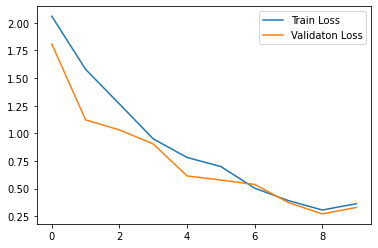

In [20]:
print(vgg3hist.history.keys())
plt.plot(vgg3hist.history["loss"],label = "Train Loss")
plt.plot(vgg3hist.history["val_loss"],label = "Validaton Loss")
plt.legend()
plt.show()


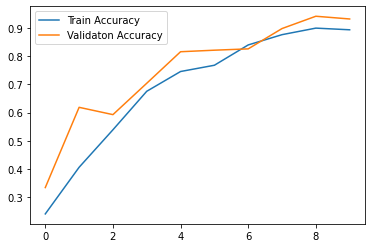

In [21]:
plt.figure()
plt.plot(vgg3hist.history["accuracy"],label = "Train Accuracy")
plt.plot(vgg3hist.history["val_accuracy"],label = "Validaton Accuracy")
plt.legend()
plt.show()


# VGG13

In [23]:
vggmodel = Sequential() 
vggmodel.add(Conv2D(64,(3,3),activation = 'relu', input_shape = shape_of_image.shape))
vggmodel.add(Conv2D(64,(3,3),activation = 'relu'))
vggmodel.add(MaxPooling2D(2, 2))

vggmodel.add(Conv2D(128,(3,3),activation = 'relu'))
vggmodel.add(Conv2D(128,(3,3),activation = 'relu'))
vggmodel.add(MaxPooling2D(2,2))

vggmodel.add(Conv2D(256,(3,3),activation = 'relu'))
vggmodel.add(Conv2D(256,(3,3),activation = 'relu'))
vggmodel.add(Conv2D(256,(3,3),activation = 'relu'))
vggmodel.add(MaxPooling2D(2,2))

vggmodel.add(Conv2D(512,(3,3),activation = 'relu'))
vggmodel.add(Conv2D(512,(3,3),activation = 'relu'))
vggmodel.add(Conv2D(512,(3,3),activation = 'relu'))
vggmodel.add(MaxPooling2D(2,2))




vggmodel.add(Flatten())
vggmodel.add(Dense(6000,activation='relu'))
vggmodel.add(Dropout(0.5))
vggmodel.add(Dense(number_of_class,activation = 'softmax'))
vggmodel.compile(loss = 'categorical_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['accuracy'])



In [24]:
hist1 = vggmodel.fit_generator(
    generator = train_generator,
    steps_per_epoch = 50,
    epochs = 10,
    validation_data = test_generator,
                   )

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
50/50 [==============================] - 20s 315ms/step - loss: 9.6690 - accuracy: 0.1199 - val_loss: 2.4487 - val_accuracy: 0.2015
Epoch 2/10
50/50 [==============================] - 14s 274ms/step - loss: 2.2959 - accuracy: 0.1480 - val_loss: 2.2652 - val_accuracy: 0.1232
Epoch 3/10
50/50 [==============================] - 14s 273ms/step - loss: 2.2236 - accuracy: 0.1863 - val_loss: 2.3464 - val_accuracy: 0.1201
Epoch 4/10
50/50 [==============================] - 13s 271ms/step - loss: 2.1197 - accuracy: 0.2224 - val_loss: 2.0454 - val_accuracy: 0.1592
Epoch 5/10
50/50 [==============================] - 14s 273ms/step - loss: 1.9639 - accuracy: 0.2594 - val_loss: 2.2848 - val_accuracy: 0.1193
Epoch 6/10
50/50 [==============================] - 14s 275ms/step - loss: 1.8686 - accuracy: 0.3167 - val_loss: 1.5115 - val_accuracy: 0.4308
Epoch 7/10
50/50 [==============================] - 14s 274ms/step - loss: 1.6303 - accuracy: 0.3953 - val_loss: 1.4021 - val_accuracy: 0.4941

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


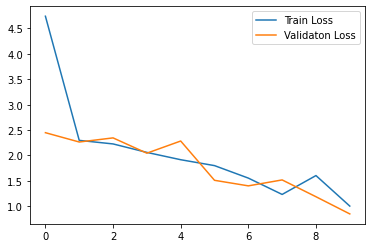

In [25]:
print(hist1.history.keys())
plt.plot(hist1.history["loss"],label = "Train Loss")
plt.plot(hist1.history["val_loss"],label = "Validaton Loss")
plt.legend()
plt.show()


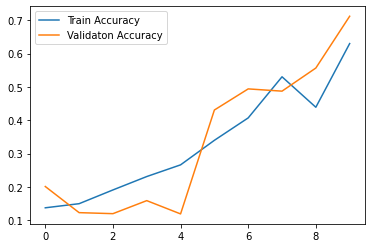

In [26]:
plt.figure()
plt.plot(hist1.history["accuracy"],label = "Train Accuracy")
plt.plot(hist1.history["val_accuracy"],label = "Validaton Accuracy")
plt.legend()
plt.show()


# LENET

In [27]:
input_shape = (100,100,3)
lenet = tf.keras.Sequential([
    tf.keras.layers.Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='tanh', input_shape=input_shape, padding="same"),
    tf.keras.layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'),
    tf.keras.layers.Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid'),
    tf.keras.layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(120, activation = 'tanh'),
    tf.keras.layers.Dense(84, activation = 'tanh'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

lenet.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])


lenethist = lenet.fit_generator(
    generator = train_generator,
    steps_per_epoch = 50,
    epochs = 10,
    validation_data = test_generator,
                   )

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
50/50 [==============================] - 11s 215ms/step - loss: 1.7448 - accuracy: 0.4013 - val_loss: 0.9430 - val_accuracy: 0.6660
Epoch 2/10
50/50 [==============================] - 11s 214ms/step - loss: 0.9252 - accuracy: 0.7042 - val_loss: 0.7263 - val_accuracy: 0.7762
Epoch 3/10
50/50 [==============================] - 11s 214ms/step - loss: 0.6788 - accuracy: 0.7995 - val_loss: 0.8442 - val_accuracy: 0.6891
Epoch 4/10
50/50 [==============================] - 11s 214ms/step - loss: 0.5507 - accuracy: 0.8296 - val_loss: 0.4244 - val_accuracy: 0.8891
Epoch 5/10
50/50 [==============================] - 11s 214ms/step - loss: 0.3742 - accuracy: 0.8994 - val_loss: 0.3897 - val_accuracy: 0.8779
Epoch 6/10
50/50 [==============================] - 11s 213ms/step - loss: 0.2893 - accuracy: 0.9188 - val_loss: 0.3938 - val_accuracy: 0.8857
Epoch 7/10
50/50 [==============================] - 10s 211ms/step - loss: 0.2721 - accuracy: 0.9288 - val_loss: 0.3190 - val_accuracy: 0.9252

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


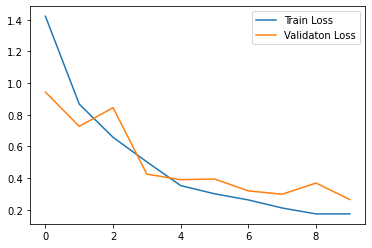

In [28]:
print(lenethist.history.keys())
plt.plot(lenethist.history["loss"],label = "Train Loss")
plt.plot(lenethist.history["val_loss"],label = "Validaton Loss")
plt.legend()
plt.show()

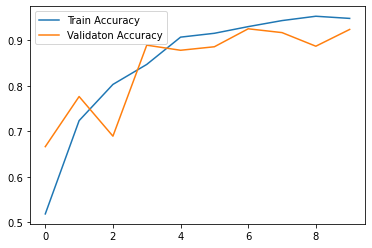

In [29]:
plt.figure()
plt.plot(lenethist.history["accuracy"],label = "Train Accuracy")
plt.plot(lenethist.history["val_accuracy"],label = "Validaton Accuracy")
plt.legend()
plt.show()


# RESNET50

In [30]:

resnet = Sequential()
resnet.add(InputLayer(input_shape= (100,100,3)))

resnet.add(Conv2D(filters = 64, kernel_size= 7,strides=2, padding= 'same', activation= 'relu'))

resnet.add(Conv2D(filters= 32, kernel_size= 5, padding='same', activation= 'relu'))
resnet.add(MaxPool2D(pool_size=2, strides=2))
resnet.add(Conv2D(filters= 16, kernel_size= 5, padding='same', activation= 'relu'))


resnet.add(Flatten())
resnet.add(Dense(256, activation= tf.keras.activations.relu))

resnet.add(Dense(10, activation= 'softmax'))

resnet.compile(
             loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])
  
resnethist = resnet.fit_generator(
    generator = train_generator,
    steps_per_epoch = 50,
    epochs = 15,
    validation_data = test_generator,
  
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/15
50/50 [==============================] - 12s 231ms/step - loss: 2.1223 - accuracy: 0.2454 - val_loss: 0.9952 - val_accuracy: 0.5750
Epoch 2/15
50/50 [==============================] - 11s 226ms/step - loss: 1.1941 - accuracy: 0.5998 - val_loss: 0.6096 - val_accuracy: 0.7839
Epoch 3/15
50/50 [==============================] - 11s 224ms/step - loss: 0.7605 - accuracy: 0.7377 - val_loss: 0.4477 - val_accuracy: 0.8674
Epoch 4/15
50/50 [==============================] - 11s 228ms/step - loss: 0.5424 - accuracy: 0.8251 - val_loss: 0.4869 - val_accuracy: 0.7824
Epoch 5/15
50/50 [==============================] - 11s 227ms/step - loss: 0.3992 - accuracy: 0.8694 - val_loss: 0.3948 - val_accuracy: 0.8683
Epoch 6/15
50/50 [==============================] - 11s 224ms/step - loss: 0.3096 - accuracy: 0.9006 - val_loss: 0.3481 - val_accuracy: 0.8713
Epoch 7/15
50/50 [==============================] - 11s 227ms/step - loss: 0.2923 - accuracy: 0.9052 - val_loss: 0.3164 - val_accuracy: 0.8906

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


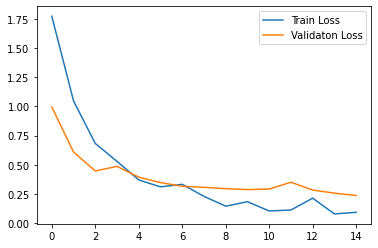

In [31]:
print(resnethist.history.keys())
plt.plot(resnethist.history["loss"],label = "Train Loss")
plt.plot(resnethist.history["val_loss"],label = "Validaton Loss")
plt.legend()
plt.show()

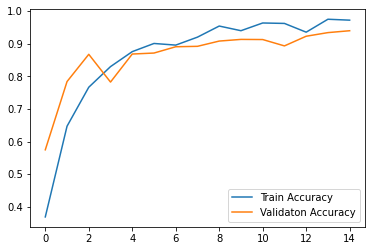

In [32]:
plt.figure()
plt.plot(resnethist.history["accuracy"],label = "Train Accuracy")
plt.plot(resnethist.history["val_accuracy"],label = "Validaton Accuracy")
plt.legend()
plt.show()

In [33]:
classnamess=list(test_generator.class_indices.keys())
import numpy as np

# RESULTS

VGG3 results

Zero_one loss 0.0


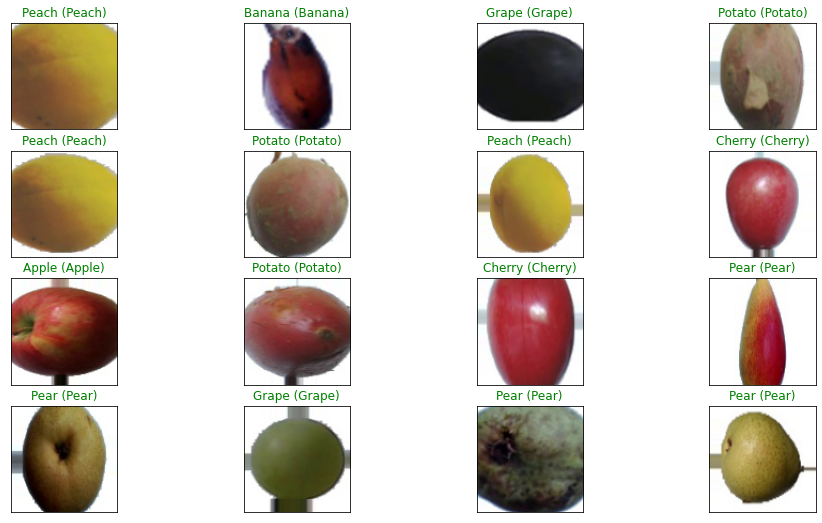

In [34]:
x,y=train_generator.next()
y_vgg3pred=vgg3.predict(x)



loss=[]
fig = plt.figure(figsize=(16, 9))
for i, idx in enumerate(np.random.choice(len(test_generator), size=16, replace=False)):
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x[i]))
    pred_idx = np.argmax(y_vgg3pred[i])
    true_idx = np.argmax(y[i])

    ax.set_title("{} ({})".format(classnamess[pred_idx], classnamess[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))
    
    if pred_idx==true_idx:

          loss.append(0)
    else:
       loss.append(1)


print("Zero_one loss",np.mean(loss))

In [38]:
vgg3.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 100, 100, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 100, 100, 32)      9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 50, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 50, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 50, 50, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 64)        0

VGG13 results

Zero one loss 0.1875


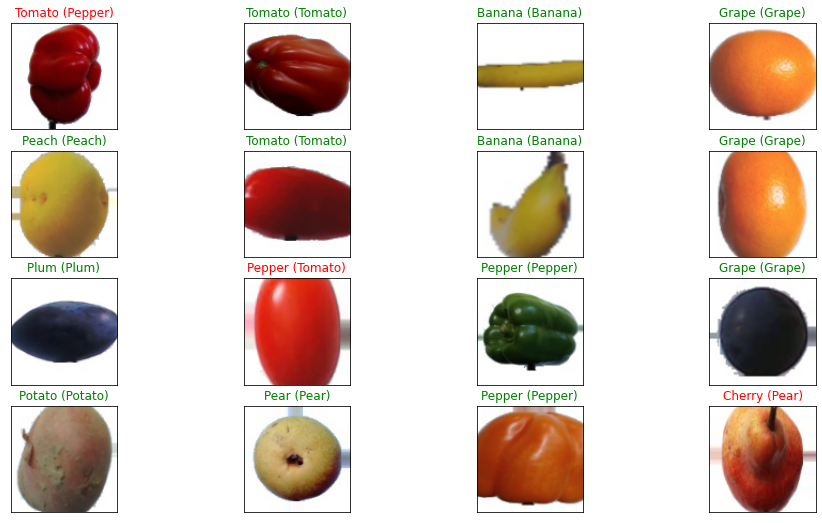

In [35]:
x,y=train_generator.next()
y_vgg13pred=vggmodel.predict(x)



loss=[]
fig = plt.figure(figsize=(16, 9))
for i, idx in enumerate(np.random.choice(len(test_generator), size=16, replace=False)):
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x[i]))
    pred_idx = np.argmax(y_vgg13pred[i])
    true_idx = np.argmax(y[i])

    ax.set_title("{} ({})".format(classnamess[pred_idx], classnamess[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))
    
    if pred_idx==true_idx:

          loss.append(0)
    else:
       loss.append(1)


print("Zero one loss",np.mean(loss))

In [40]:
vggmodel.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 98, 98, 64)        1792      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 96, 96, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 48, 48, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 46, 46, 128)       73856     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 44, 44, 128)       147584    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 22, 22, 128)       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 20, 20, 256)      

LENET RESULTS

Zero one loss  0.0


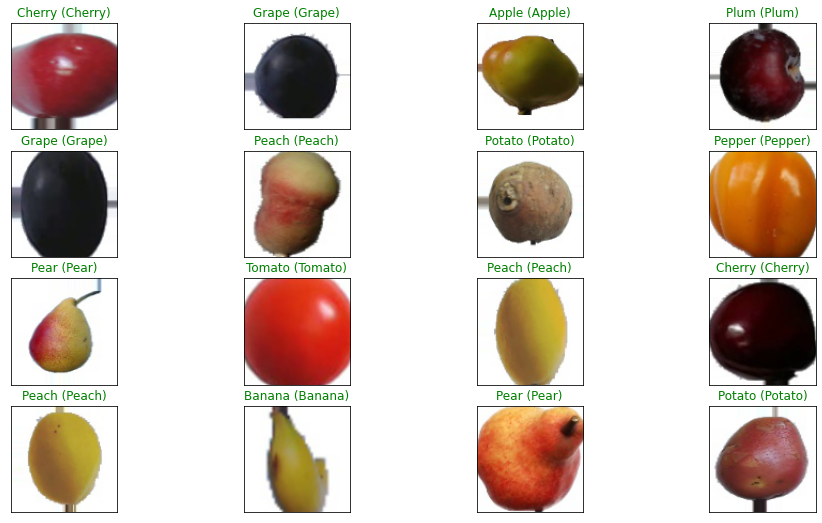

In [36]:
x,y=train_generator.next()
y_lenetpred=lenet.predict(x)



loss=[]
fig = plt.figure(figsize=(16, 9))
for i, idx in enumerate(np.random.choice(len(test_generator), size=16, replace=False)):
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x[i]))
    pred_idx = np.argmax(y_lenetpred[i])
    true_idx = np.argmax(y[i])

    ax.set_title("{} ({})".format(classnamess[pred_idx], classnamess[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))
    
    if pred_idx==true_idx:

          loss.append(0)
    else:
       loss.append(1)


print("Zero one loss ",np.mean(loss))


In [41]:
lenet.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 100, 100, 6)       456       
_________________________________________________________________
average_pooling2d (AveragePo (None, 50, 50, 6)         0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 46, 46, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 23, 23, 16)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 8464)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 120)               1015800   
_________________________________________________________________
dense_5 (Dense)              (None, 84)               

Resnet RESULTS

Zero one loss 0.0


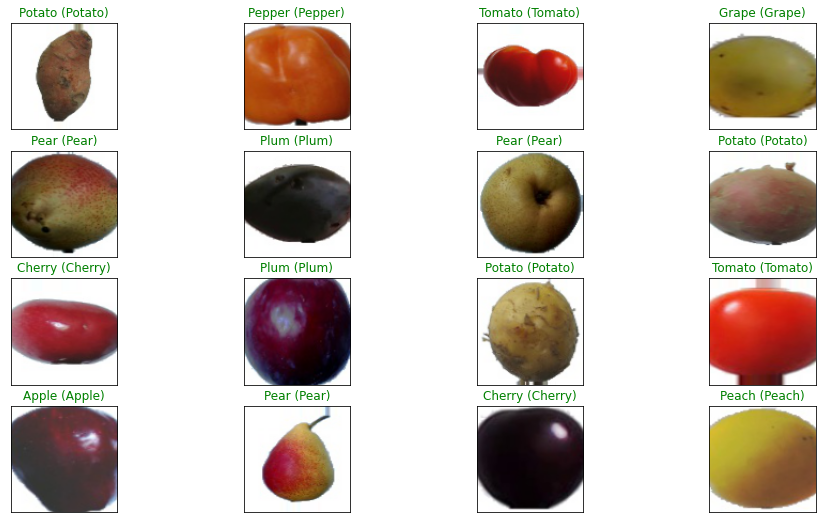

In [37]:
x,y=train_generator.next()
y_resnet=resnet.predict(x)



loss=[]
fig = plt.figure(figsize=(16, 9))
for i, idx in enumerate(np.random.choice(len(test_generator), size=16, replace=False)):
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x[i]))
    pred_idx = np.argmax(y_resnet[i])
    true_idx = np.argmax(y[i])

    ax.set_title("{} ({})".format(classnamess[pred_idx], classnamess[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))
    
    if pred_idx==true_idx:

          loss.append(0)
    else:
       loss.append(1)


print("Zero one loss",np.mean(loss))

  

In [42]:
resnet.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 50, 50, 64)        9472      
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 50, 50, 32)        51232     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 25, 25, 16)        12816     
_________________________________________________________________
flatten_3 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)               2560256   
_________________________________________________________________
dense_8 (Dense)              (None, 10)               